In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_df.csv')

In [3]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CryoSleep,12970,3,False,8079,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,12970,4,TRAPPIST-1e,9142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,12970.0,NaN,NaN,NaN,28.771969,14.23671,0.0,20.0,27.0,37.0,79.0
VIP,12970,3,False,12401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RoomService,12970.0,NaN,NaN,NaN,218.378026,641.766201,0.0,0.0,0.0,42.75,14327.0
FoodCourt,12970.0,NaN,NaN,NaN,441.890979,1568.038076,0.0,0.0,0.0,62.75,29813.0
ShoppingMall,12970.0,NaN,NaN,NaN,170.779491,584.15363,0.0,0.0,0.0,23.0,23492.0
Spa,12970.0,NaN,NaN,NaN,301.722282,1118.746785,0.0,0.0,0.0,50.0,22408.0
VRDeck,12970.0,NaN,NaN,NaN,300.45027,1168.655639,0.0,0.0,0.0,36.0,24133.0
Transported,8693.0,NaN,NaN,NaN,0.503624,0.500016,0.0,0.0,1.0,1.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CryoSleep     12970 non-null  object 
 1   Destination   12970 non-null  object 
 2   Age           12970 non-null  float64
 3   VIP           12970 non-null  object 
 4   RoomService   12970 non-null  float64
 5   FoodCourt     12970 non-null  float64
 6   ShoppingMall  12970 non-null  float64
 7   Spa           12970 non-null  float64
 8   VRDeck        12970 non-null  float64
 9   Transported   8693 non-null   float64
 10  Deck          12970 non-null  object 
 11  Side          12970 non-null  object 
 12  HomePlanet    12970 non-null  object 
dtypes: float64(7), object(6)
memory usage: 1.3+ MB


In [5]:
df = pd.get_dummies(df, drop_first=True)

In [6]:
# Data to be predicted
desired_col = df[df['Transported'].isnull()]
desired_col = desired_col.drop(['Transported'], axis = 1)

In [7]:
desired_col.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep_None,CryoSleep_True,Destination_None,Destination_PSO J318.5-22,...,Deck_E,Deck_F,Deck_G,Deck_None,Deck_T,Side_P,Side_S,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_None
8693,27.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
8694,19.0,0.0,9.0,0.0,2823.0,0.0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
8695,31.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
8696,38.0,0.0,6652.0,0.0,181.0,585.0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8697,20.0,10.0,0.0,635.0,0.0,0.0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [8]:
#Training data
tr_data = df.copy()
tr_data = tr_data.dropna()

In [9]:
tr_data.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CryoSleep_None,CryoSleep_True,Destination_None,...,Deck_E,Deck_F,Deck_G,Deck_None,Deck_T,Side_P,Side_S,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_None
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1.0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0.0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0.0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1.0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [10]:
X = tr_data.drop('Transported', axis = 1)
y = tr_data['Transported']

In [11]:
y = y.astype('int64')

## Gradient Boost classifier

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

In [41]:
model = GradientBoostingClassifier(max_depth=3, n_estimators=125)

In [42]:
model.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=125)

In [43]:
preds = model.predict(X_test)

In [44]:
## Оценка работы модели

from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

In [45]:
confusion_matrix(y_test,preds)

array([[514, 157],
       [ 99, 534]], dtype=int64)

C:\Users\79852\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


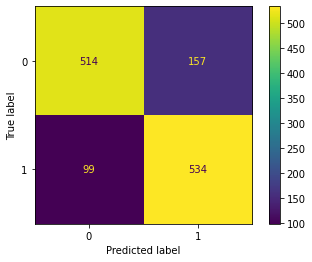

In [46]:
plot_confusion_matrix(model,X_test,y_test)

In [47]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       671
           1       0.77      0.84      0.81       633

    accuracy                           0.80      1304
   macro avg       0.81      0.80      0.80      1304
weighted avg       0.81      0.80      0.80      1304



In [48]:
model.feature_importances_

array([3.49930012e-02, 9.41742311e-02, 7.69808881e-02, 3.55224192e-02,
       1.15895890e-01, 1.11365500e-01, 3.94407122e-04, 3.86848401e-01,
       3.50010812e-04, 1.34909561e-03, 4.20352597e-03, 1.30988968e-04,
       0.00000000e+00, 5.08767945e-04, 5.95381574e-03, 0.00000000e+00,
       1.81568428e-02, 5.70643485e-03, 5.50258932e-02, 1.21614383e-03,
       0.00000000e+00, 2.45981731e-03, 1.47053581e-02, 2.49549503e-02,
       8.93296585e-03, 1.70650091e-04])

In [49]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])\
.sort_values('Feature Importance', ascending=False)

,Feature Importance
CryoSleep_True,0.386848
Spa,0.115896
VRDeck,0.111366
RoomService,0.094174
FoodCourt,0.076981
Deck_G,0.055026
ShoppingMall,0.035522
Age,0.034993
HomePlanet_Europa,0.024955
Deck_E,0.018157


In [51]:
error_rates = []

for n in range(1,96):
    
    model = GradientBoostingClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - accuracy_score(y_test,preds)
    
    error_rates.append(err)

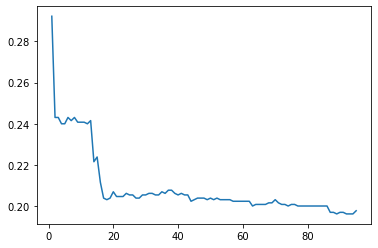

In [52]:
plt.plot(range(1,96),error_rates)

In [53]:
feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Importance'])

In [54]:
imp_feats = feats[feats['Importance']>0]

In [55]:
imp_feats = imp_feats.sort_values("Importance")

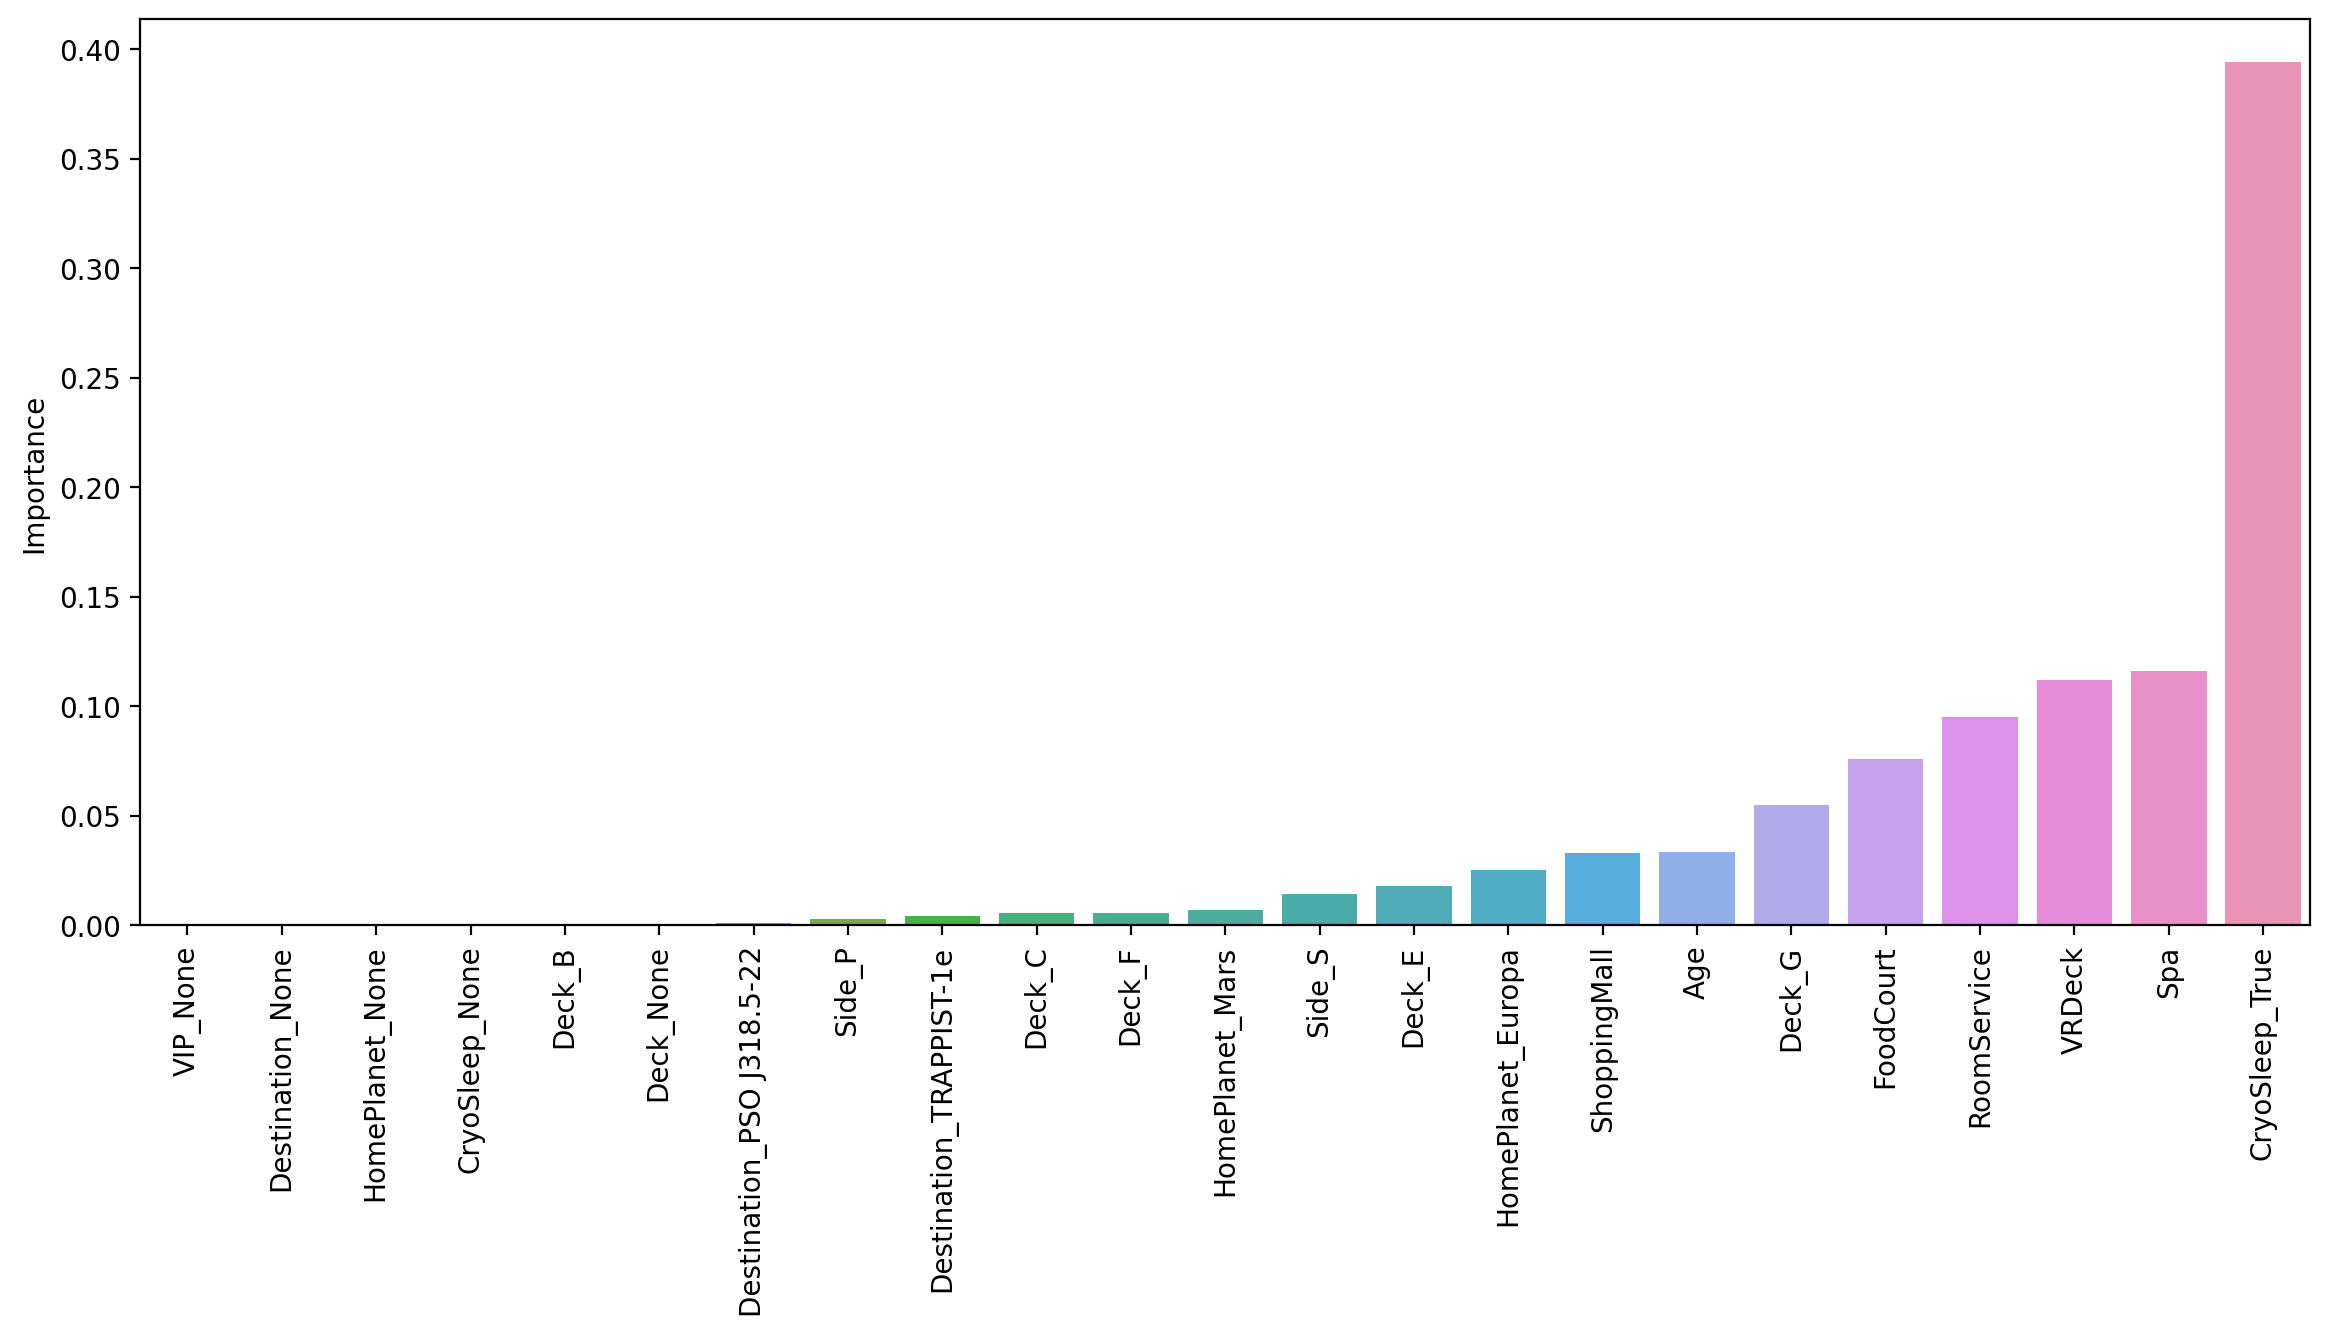

In [56]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')

plt.xticks(rotation=90);

In [14]:
from sklearn.model_selection import GridSearchCV

In [32]:
param_grid = {"n_estimators":[124,125,126],'max_depth':[3]}

In [33]:
model = GradientBoostingClassifier()

In [34]:
grid = GridSearchCV(model,param_grid)

In [35]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3], 'n_estimators': [124, 125, 126]})

In [36]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 125}

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [38]:
y_pred = grid.predict(X_test)

C:\Users\79852\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


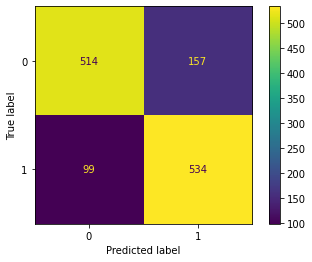

In [39]:
plot_confusion_matrix(grid,X_test,y_test);

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       671
           1       0.77      0.84      0.81       633

    accuracy                           0.80      1304
   macro avg       0.81      0.80      0.80      1304
weighted avg       0.81      0.80      0.80      1304



In [57]:
final_model = GradientBoostingClassifier(max_depth=3, n_estimators=125)

In [58]:
final_model.fit(X, y)

GradientBoostingClassifier(n_estimators=125)

In [59]:
final_pred = final_model.predict(X)

In [60]:
print(classification_report(y,final_pred))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      4315
           1       0.79      0.86      0.83      4378

    accuracy                           0.82      8693
   macro avg       0.82      0.82      0.82      8693
weighted avg       0.82      0.82      0.82      8693



In [61]:
result = final_model.predict(desired_col)

In [62]:
test = pd.read_csv('test.csv')

In [63]:
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Transported':result})
submission['Transported'] = submission['Transported'].astype(int)
print(submission.shape)

(4277, 2)


In [64]:
submission['Transported'].value_counts()

1    2339
0    1938
Name: Transported, dtype: int64

In [65]:
submission['Transported'] = submission['Transported'].astype('bool')

In [66]:
filename = 'space_preds.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: space_preds.csv
